# nmi | spring 2024
## lecture 18 : collocation


### 7.3 collocation and FEM


while FDM replaced derivatives with friendly algebra, this time the solution is functional. ie,
</br></br>

$$y(t) = c_1\phi_1(t) + \dots + c_n\phi_n(t).$$
</br>

ie, for whatever basis $\phi$, determine $c_i$.
</br>


#### 7.3.1 collocation


apply the previous to BVP and evaluate at a grid of points. ie, for interval of $t$ of $n-1$ subintervals ($n$ points), then $n$ equations solve for as many $c_i$.
</br>


for BVP
</br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = f(t,y,y') \\
      y(a) = y_a \\
      y(b) = y_b.
    \end{array}
  \right.
\end{align}
</br>

choose $n$ points inclusive of $a,b$,
</br></br>

$$a = t_1 < t_2 < \dots < t_n = b.$$
</br></br>

eg, choose basis $\phi_j(t) = t^{j-1}$ for $1 \le j \le n$.
</br></br>

$$y(t) = \sum_{j=1}^n c_j\phi_j(t) = \sum_{j=1}^n c_jt^{j-1}.$$
</br>

for boundary conditions:
</br></br>

\begin{align}
  i &= 1 : \sum_{j=1}^n c_j a^{j-1} = y(a) \\
  i &= n : \sum_{j=1}^n c_j b^{j-1} = y(b).
\end{align}
</br>

and remaining $n-2$ equations are from differential equations evaluated at $t_i$ for $2 \le i \le n-1$.
</br>

\begin{align}
  y'' &= f(t,y,y') \\
  \\
  &\quad\Downarrow \\
  \\
  \sum_{j=1}^n (j-1)(j-2) c_jt^{j-3} &= f\left( t,\sum_{j-1}^nc_jt^{j-1},\sum_{j=1}^nc_j(j-1)t^{j-2} \right)
\end{align}
</br>

ie, evaluating at $t_i$ for each $i$ yields $n$ equations for $c_i$.
</br>


##### example 11


example 11 revisits example 07 using collocation.
</br>

\begin{align}
  \text{example 11} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = 4y \\
      y(0) = 1 \\
      y(1) = 3.
    \end{array}
  \right.
\end{align}
</br>


at end points $t=0,1$
</br></br>

\begin{align}
  c_1 &= \sum_{j=1}^n c_j\phi_j(0) = y(0) = 1 \\
  c_1 + \dots + c_n &= \sum_{j=1}^n c_j\phi_j(1) = y(1) = 3.
\end{align}
</br>

at $n-2$ intermediate points $i$
</br></br>

\begin{align}
  \quad&\sum_{j=1}^n (j-1)(j-2)c_jt_i^{j-3} - 4\sum_{j=1}^n c_jt_i^{j-1} = 0. \\
  \\
  &\quad \Downarrow \\
  \\
  \quad&\sum_{j=1}^n \left[ (j-1)(j-2)t_i^{j-3} - 4t_i^{j-1} \right]c_j = 0 \\
  \\
  &\quad \Downarrow
\end{align}
</br>

$n$ equations for $A_{nxn}c = g$,
</br></br>

\begin{align}
  A_{ij} =
  \left\{ \quad
    \begin{array}{l}
      1 \quad 0 \quad 0 \quad \dots \quad 0 & \text{ row } i = 1 \\
      (j-1)(j-2)t_i^{j-3} - 4t_i^{j-1} & \text{ rows } i = 2,\dots,n-1 \\
      1 \quad 1 \quad 1 \quad \dots \quad 1 & \text{ row } i = n
    \end{array}
  \right.
\end{align}
</br>

and $g = [1,0,0,\dots,3]^T$. if $t$ evenly spaced,
</br></br>

$$t_i = a + \frac{i-1}{n-1}(b-a) = \frac{i-1}{n-1}.$$
</br></br>

solver of choice returns $c_j$ which finishes the approximation $y(t) = \sum c_jt^{j-1}$.
</br><br>

for $n=2$,
</br></br>

$$\begin{bmatrix} 1 & 0 \\ 1  & 1 \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \end{bmatrix} \quad\Rightarrow\quad c = \begin{bmatrix} 1 & 2 \end{bmatrix}^T.$$
</br>


###### code


n=2,c=[1. 2.]
n=4,c=[ 1.         -0.18858561  1.02729529  1.16129032]


eg 7.11, actual vs n points by collocation



,t,y,t2,w2,t4,w4
0,0.0,1.00000,0.0,1.0,0.00000,1.00000
1,0.1,0.97776,1.0,3.0,0.33333,1.09429
2,0.2,0.99475,NaN,NaN,0.66667,1.67494
3,0.3,1.05167,NaN,NaN,1.00000,3.00000
4,0.4,1.15080,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6,0.6,1.49344,NaN,NaN,NaN,NaN
7,0.7,1.75070,NaN,NaN,NaN,NaN
8,0.8,2.07823,NaN,NaN,NaN,NaN
9,0.9,2.48917,NaN,NaN,NaN,NaN


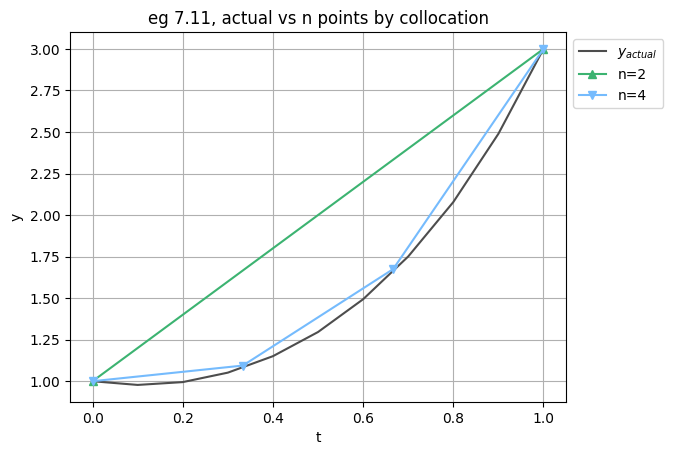

In [ ]:
# example 11 collocation

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  # actual, from example 07
  def y_actual(t):
    rc = np.zeros_like(t)

    e2p,e2m = np.exp(2),np.exp(-2)
    c1 = (3-e2m)/(e2p-e2m)
    c2 = (e2p-3)/(e2p-e2m)
    rc = c1*np.exp(2*t) + c2*np.exp(-2*t)

    return rc

  # basis
  phi = lambda t,j: pow(t,j)
  f = lambda t,j: j*(j-1)*phi(t,j-2) - 4*phi(t,j) # y''
  def y_coll(t,c,n):                              # collocation
    rc = 0
    for j in range(n):
      rc += c[j]*phi(t,j)
    return rc

  # bv,interval
  bv = np.array([1.,3.])
  t = np.array([0.,1.])

  # n points
  ns = np.array([2,4])
  nmax = max(ns)

  # datastore, allocate
  ymax = 11 # enough actual points to look like a curve
  ds = np.empty((max(nmax,ymax),2*(ns.size+1))) # cols: (x,y) x (actual + n trials)
  ds[:] = np.nan

  # set, save, label actual
  ts = np.linspace(t[0],t[1],ymax)
  ys = np.zeros_like(ts)
  ys = y_actual(ts)
  ds[0:ts.size,0] = ts
  ds[0:ys.size,1] = ys
  scols = ["t","y"]

  # calculate coeffs for n in (ns)
  for k in range(ns.size):
    n = ns[k]
    # n-1 subintervals
    ts = np.linspace(t[0],t[1],n)

    # a
    a = np.zeros((n,n))
    for i in range(n): # rows
      for j in range(n): # cols ~ basis terms
        if (i>0) and (i<n-1):   # intermediate
          a[i,j] = f(ts[i],j)
        else:
          a[i,j] = phi(ts[i],j) # boundary

    # g
    g = np.zeros((n,1))
    g[0],g[n-1] = bv[0],bv[1]

    # c, basis coefficients
    c_phi = np.zeros_like(g)
    c_phi = np.linalg.solve(a,g) # <--- this is the solver
    print(f"n={n},c={c_phi.flatten()}")

    # use the approx coeffs
    w = np.zeros_like(c_phi)
    w = y_coll(ts,c_phi,n)

    # save + label cols
    ds[0:ts.size,2*(k+1)] = ts
    ds[0:w.size,2*(k+1)+1] = w
    scols.append("t"+str(n))
    scols.append("w"+str(n))

  # dataframe from datastore
  s_title = "example 11, actual vs n points by collocation"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",5)
  df = pd.DataFrame(data=ds,columns=scols)
  if True: # spreadsheet
    display(df)

  if True: # plot using pandas
    print() # spacer
    ax1  = df.plot(x="t",y="y",label="$y_{actual}$",color=".3")
    ax11 = df.plot(x="t2",y="w2",label="n=2",ax=ax1,color="mediumseagreen",marker="^")
    ax12 = df.plot(x="t4",y="w4",label="n=4",ax=ax1,color="xkcd:sky blue",marker="v")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()


##### commentary


$\phi_i(t) = c_jt^{j-1}$ makes an easy example but dont do it again. use something other than polynomials to avoid the runge effect. eg, chebyshev roots are designed to avoid the runge effect.
</br></br>

also, for a nonlinear system, use newtons multivariate.
</br>


#### 7.3.2 finite elements and galerkin


##### finite element method (FEM)


FEM uses splines as basis functions and each is nonzero over its short range of $t$. this method gets heavy use for BVPs and PDEs in higher dimensions and in cases where irregular boundaries make life hell.
</br>



\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = f(t,y,y') \\
      y(a) = y_a \\
      y(b) = y_b.
    \end{array}
  \right.
\end{align}
</br>

FEM chooses approximate $y$ that minimizes residual $r = y'' - f$.
</br></br>

for interval $[a,b]$, define vector space of square integrable functions
</br></br>

$$L^2[a,b] = \left\{ \text{functions }y(t)\text{ on }[a,b] \quad\bigg|\int_a^b y(t)^2dt \text{ exists and is finite}\right\}.$$
</br></br>

$L^2$ function space has inner product $\langle y_1,y_2 \rangle = \int_a^b y_1(t)y_2(t)dt$ with properties
</br></br>

1. $\langle y_1,y_2 \rangle \ge 0$;
2. $\langle \alpha y_1 + \beta y_2,z \rangle = \alpha\langle y_1,z \rangle + \beta y_2,z \rangle$ for scalars $\alpha,\beta$;
3. $\langle y_1,y_2 \rangle = \langle y_2,y_1 \rangle$.
</br></br>

$y_1,y_2$ are orthogonal in $L^2$ if $\langle y_1,y_2 \rangle = 0$. bc $L^2[a,b]$ is infinite-dimensional vector space, limit $r$ computationally by choosing a basis that spans as much of $L^2$ as possible. let set of $n+2$ basis functions be $\phi_0(t) \dots \phi_{n+1}(t)$ (tbd).
</br>


##### galerkin method


1. minimize $r$ by forcing it to be orthogonal to the basis functions
</br></br>

\begin{align}
  \int_a^b(y''-f)\phi_idt &= 0 \\
  \\
  \Downarrow\quad & \\
  \\
  \int_a^b y''(t)\phi_i(t)dt &= \int_a^b f(t,y,y')\phi_i(t)dt.
\end{align}
</br>

for $o \le i \le n+1$. this is the <b>weak form</b> of BVP.
</br></br>

2. use integration by parts to eliminate second derivatives.
</br></br>

\begin{align}
  \int_a^b y''\phi_i(t)dt &= \phi_i(t)y'(t)|_a^b - \int_a^b y'(t)\phi_i'(t)dt \\
  &= \phi_i(b)y'(b) -\phi_i(a)y'(a) - \int_a^b y'(t)\phi_i'(t)dt.
\end{align}
</br>

both steps together give a set of equations for each $i$ to solve for $c_i$.
</br></br>

\begin{align}
  \int_a^b f(t,y,y')\phi_i(t)dt &= \phi_i(b)y'(b) -\phi_i(a)y'(a) - \int_a^b y'(t)\phi_i'(t)dt. \\
  \\
  &\quad\Downarrow \\
  \\
  y(t) &= \sum_{i=0}^{n+1} c_i\phi_i(t).
\end{align}
</br>

galerkin makes it easy to slot in very simple functions as the finite elements $\phi_i(t)$.
</br>


eg, consider B-splines. (thats "B" for "bezier" and this equation stuff goes back to interpolation earlier in the semester.)
</br></br>

for grid $t_0 < t_1 < \dots < t_n < t_{n+1}$ and $i = 1,\dots,n$ define
</br></br>

\begin{align}
  \phi_i(t) =
  \left\{ \quad
    \begin{array}{l}
      \frac{t-t_{i-1}}{t_i - t_{i-1}} &\quad t_{i-1} < t \le t_i \\
      \frac{t_{i+1}-t}{t_{i-1} - t_i} &\quad t_i < t < t_{i+1} \\
      0 &\quad\text{otherwise.}
    \end{array}
  \right.
\end{align}
</br>

also,
</br></br>

$\phi_0(t) = \left\{\begin{array}{l} \frac{t_1-t}{t_1 - t_0} &\quad t_0 < t \le t_1 \\ 0 &\quad\text{otherwise} \end{array}\right.\quad$ and $\quad\phi_{n+1}(t) = \left\{\begin{array}{l} \frac{t-t_n}{t_{n+1} - t_n} &\quad t_n < t \le t_{n+1} \\ 0 &\quad\text{otherwise.} \end{array}\right.$
</br>



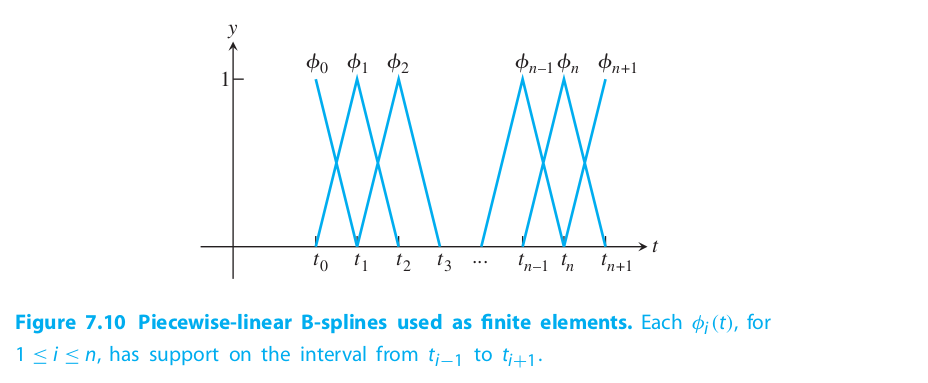

these piecewise-linear "tent" functions $\phi_i$ satisfy the following property:
</br></br>

\begin{align}
  \phi_i(t_j) =
  \left\{ \quad
    \begin{array}{l}
      1 &\quad i = j \\
      0 &\quad i \ne j
    \end{array}
  \right. .
\end{align}
</br>

for data $(t_i,c_i)$, define piecewise-linear B-spline
</br></br>

$$S(t) = \sum_{i=0}^{n+1} c_i\phi_i(t).$$
</br></br>

the last two equations together,
</br></br>

$$S(t_j) = \sum_{i=0}^{n+1}c_i\phi_i(t_j) = c_j.$$
</br></br>

ie, $S(t)$ interpolates $(t_i,c_i)$. ie, $y$-coordinates are coefficients.
</br>


for the generic solution for the general BVP.
</br></br>

boundary values:
</br></br>

\begin{align}
  y(a) &= \sum_{i=0}^{n+1} c_i\phi_i(a) = c_0\phi_0(a) = c_0 \\
  y(b) &= \sum_{i=0}^{n+1} c_i\phi_i(b) = c_{n+1}\phi_{n+i}(b) = c_{n+i}.
\end{align}
</br>

intermediate values: for $i=1,n$ (vs $i = 0,n+1$)
</br></br>

\begin{align}
  \int_a^b f(t,y,y')\phi_i(t)dt - \int_a^b y'(t)\phi_i'(t)dt &= 0 \\
  \\
  \Downarrow \quad y(t) = \sum c_i\phi_i(t) \quad & \\
  \\
  \int_a^b \phi_i(t) f\left( t,\sum c_j\phi_j(t),\sum c_j\phi_j'(t) \right)dt + \int_a^b \phi_i'(t)\sum c_j\phi_j'(t)dt &= 0
\end{align}
</br>

for evenly spaced grid of with step size $h$, the following integrals for $i=1,\dots,n$.
</br></br>

\begin{align}
  \int_a^b \phi_i(t)\phi_{i+1}(t)dt &= \int_0^h \frac{t}{h}\left( 1-\frac{t}{h} \right)dt = \int_0^h \left( \frac{t}{h} - {t^2}{h^2} \right)dt \\
  &= \frac{t^2}{2h} - \frac{t^3}{3h^2} \bigg|_0^h = \frac{h}{6} \\
  \\
  \int_a^b (\phi_i(t))^2dt &= 2\int_0^h(\frac{t}{h})^2 dt = \frac{2}{3}h \\
  \\
  \int_a^b \phi_i'(t)\phi_{i+1}'(t)dt &= \int_0^h \frac{1}{h}\left(-\frac{t}{h}\right) dt = -\frac{1}{h} \\
  \\
  \int_a^b (\phi_i'(t))^2dt &= 2\int_0^h \left(\frac{t}{h}\right)^2 dt = \frac{2}{h}.
\end{align}
</br>

was that simple? but someone else did the work and those fractions are reusable.
</br>




##### example 12


example 12 revisits example 07 using FEM.
</br>

\begin{align}
  \text{example 12} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = 4y \\
      y(0) = 1 \\
      y(1) = 3.
    \end{array}
  \right.
\end{align}
</br>



for the intermediate values:
</br></br>

\begin{align}
  0 &= \int_0^1 \left( 4\phi_i(t)\sum_{j=0}^{n+1} c_j\phi_j(t) + \sum_{j=0}^{n+1} c_j\phi_j'(t)\phi_i'(t) \right)dt \\
  &= \sum_{j=0}^{n+1} c_j \left[ 4\int_0^1 \phi_i(t)\phi_j(t)dt + \int_0^1 \phi_j'(t)\phi_i'(t)dt \right].
\end{align}
</br>

for $i = 1,\dots,n$ and $c_0 = f(a),c_{n+1} = f(b)$,
</br></br>

\begin{align}
  \left[ \frac{2}{3}h - \frac{1}{h} \right]c_0
  + \left[ \frac{8}{3}h + \frac{2}{h} \right]c_1
  + \left[ \frac{2}{3}h - \frac{1}{h} \right]c_2 &= 0 \\
  \left[ \frac{2}{3}h - \frac{1}{h} \right]c_1
  + \left[ \frac{8}{3}h + \frac{2}{h} \right]c_2
  + \left[ \frac{2}{3}h - \frac{1}{h} \right]c_3 &= 0 \\
  &\vdots \\
  \left[ \frac{2}{3}h - \frac{1}{h} \right]c_{n-1}
  + \left[ \frac{8}{3}h + \frac{2}{h} \right]c_n
  + \left[ \frac{2}{3}h - \frac{1}{h} \right]c_{n+1} &= 0
\end{align}
</br>

$c_0 = y_a = 1, c_{n+1} = y_b = 3$.
</br></br>

$$
\begin{bmatrix}
  \alpha & \beta & 0 & \dots & 0 \\
  \beta & \alpha & \ddots & \ddots & \vdots \\
  0 & \beta & \ddots & \beta & 0 \\
  \vdots & \ddots & \ddots & \alpha & \beta \\
  0 & \dots & 0 & \beta & \alpha
\end{bmatrix}
\begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_{n-1} \\ c_n
\end{bmatrix} =
\begin{bmatrix} -y_a\beta \\ 0 \\ \vdots \\ 0 \\ -y_b\beta
\end{bmatrix}
$$
</br>

where
</br></br>

$$\alpha = \frac{8}{3}h + \frac{2}{h}, \beta = \frac{2}{3}h - \frac{1}{h}.$$
</br>


###### code




example 12, actual vs n=3 points by b-spline



,ti,ci,yi
0,0.00,1.00000,1.00000
1,0.25,1.01091,1.01812
2,0.50,1.28554,1.29611
3,0.75,1.89553,1.90494
4,1.00,3.00000,3.00000


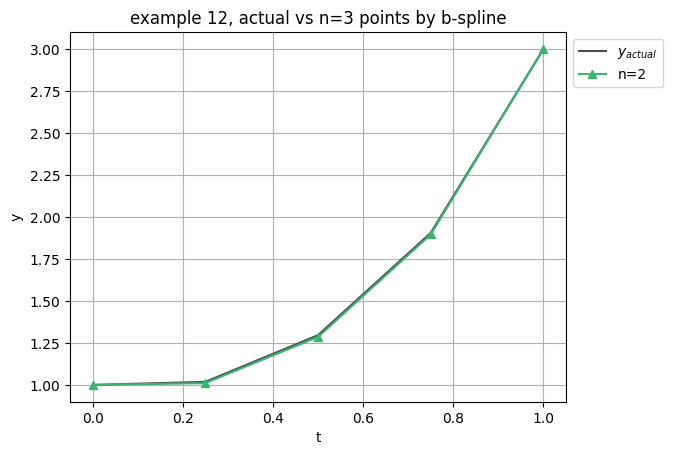

In [1]:
# program 7.2 fem

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  # actual, from example 07
  def y_actual(t):
    dy = np.zeros_like(t)

    e2p,e2m = np.exp(2),np.exp(-2)
    c1 = (3-e2m)/(e2p-e2m)
    c2 = (e2p-3)/(e2p-e2m)
    dy = c1*np.exp(2*t) + c2*np.exp(-2*t)

    return dy

  # basis ~ b-spline
  def bvp_fem(t,bv,n):
    '''
    t  : [a,b] span of interval
    bv : [ya,yb] values at ends of interval
    n  : intermediate points ~ total points ts = [0,1,...,n,n+1]
    '''
    c = np.zeros((n,1))

    a,b = t[0],t[1]
    ya,yb = bv[0],bv[1]
    h = (b-a)/(n+1)

    alpha = (8/3)*h+2/h
    beta = (2/3)*h-1/h

    M = np.zeros((n,n))
    np.fill_diagonal(M,alpha)
    for i in range(n-1):
      M[i,i+1] = M[i+1,i] = beta

    d = np.zeros((n,1))
    d[0],d[n-1] = -ya*beta,-yb*beta

    c = np.linalg.solve(M,d)
    return c

  t = [0,1]
  bv = [1,3]
  n = 3
  c = bvp_fem(t,bv,n)

  ts = np.linspace(t[0],t[1],n+2)
  ys = y_actual(ts)
  ds = np.zeros((n+2,3)) # cols: ti,wi=ci,yi
  ds[:,0] = ts
  ds[0,1:] = [bv[0],bv[0]]
  ds[n+1,1:] = [bv[1],bv[1]]
  ds[1:n+1,1] = c.flatten()
  ds[1:n+1,2] = ys[1:n+1]

  # dataframe from datastore
  s_title = f"example 12, actual vs n={n} points by b-spline"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",5)
  df = pd.DataFrame(data=ds,columns=["ti","ci","yi"])
  if True: # spreadsheet
    display(df)

  if True: # plot ~ with pandas dataframe
    #plot, data
    ax1  = df.plot(x="ti",y="yi",label="$y_{actual}$",color=".3")
    ax11 = df.plot(x="ti",y="ci",label="n=2",ax=ax1,color="mediumseagreen",marker="^")

    # plot, style
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')
    plt.legend(bbox_to_anchor=(1,1))

    # plot, show
    print() # spacer
    plt.show()

if __name__ == "__main__":
  main()

